In [1]:
library(rgeos)
library(sp)
library(rgdal)

rgeos version: 0.3-25, (SVN revision 555)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 r0 
 Linking to sp version: 1.2-5 
 Polygon checking: TRUE 

rgdal: version: 1.2-13, (SVN revision 686)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.5, released 2016/07/01
 Path to GDAL shared files: /usr/local/Cellar/gdal/1.11.5_2/share/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


In [2]:
sea_map <- readOGR('../neighborhoods_shape/StatePlane/Neighborhoods.shp')

OGR data source with driver: ESRI Shapefile 
Source: "../neighborhoods_shape/StatePlane/Neighborhoods.shp", layer: "Neighborhoods"
with 119 features
It has 12 fields


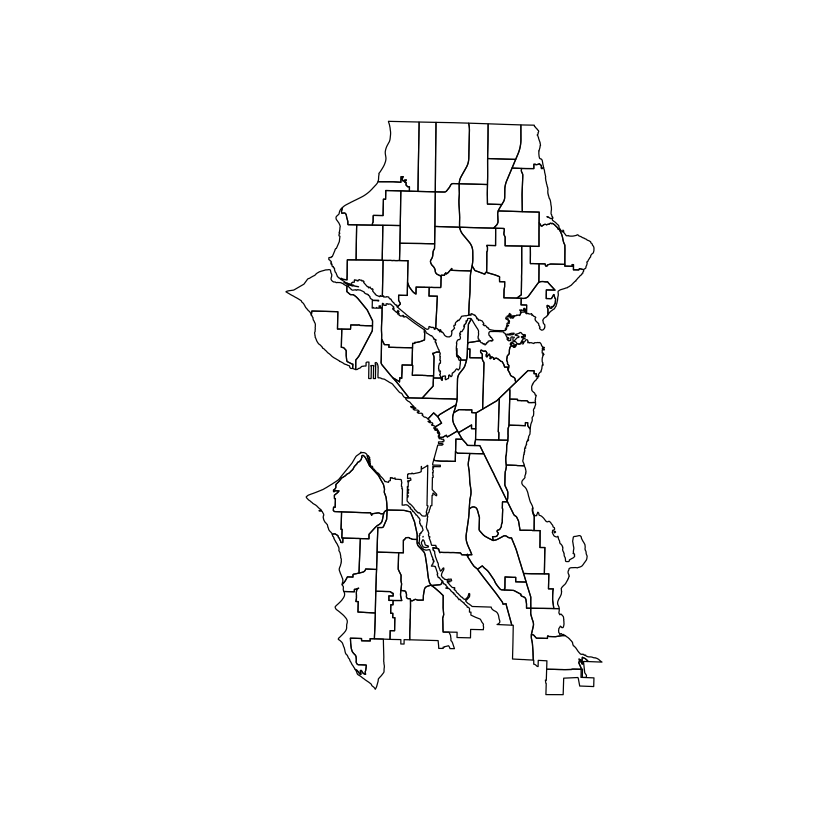

In [3]:
plot(sea_map)

In [4]:
mask <- sea_map$S_HOOD != 'OOO' # Filter out mystery hoods
mask[is.na(mask)] <- FALSE # Fix NA
sea_map <- sea_map[mask,]

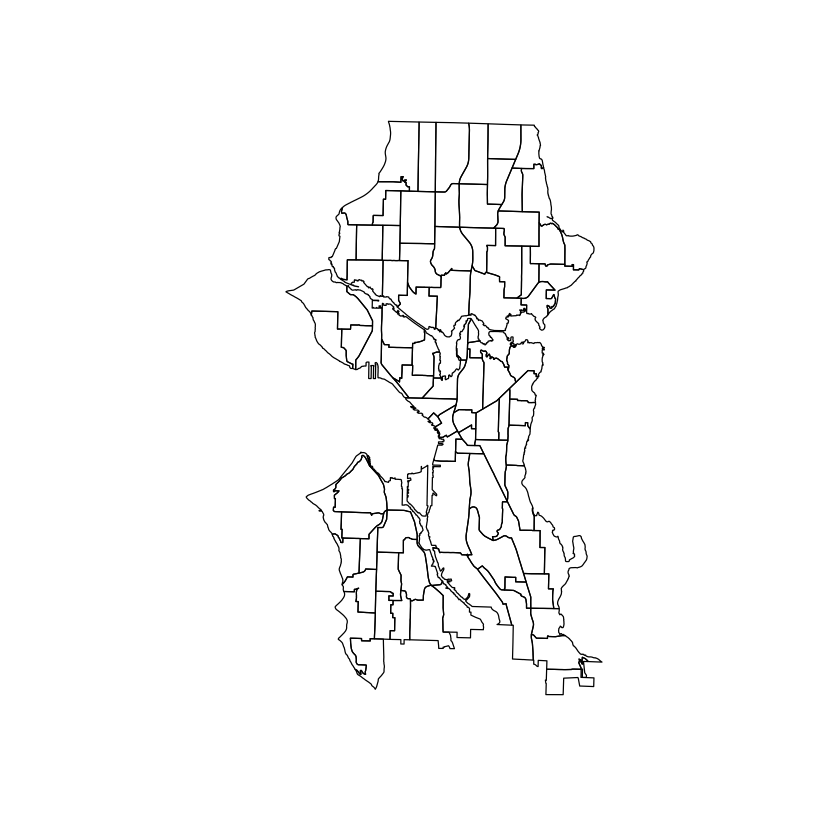

In [5]:
plot(sea_map)

In [6]:
dta <- read.csv('../data/seattle_911_time_features.csv')

In [7]:
head(dta)

Address,Type,Latitude,Longitude,Timestamp,Date,Time,Weekday,Monday,Tuesday,⋯,Friday,Saturday,Night,DangHoliday,TravHoliday,DayNumber,Seasonality,MarinersHome,SeahawksHome,SoundersHome
6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-10,23:33:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0
N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0
E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0
611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-10,23:29:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0
4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-10,23:25:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0
2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-10,23:17:00,Thursday,FALSE,FALSE,⋯,FALSE,FALSE,1,0,0,499,-0.1275943,0,0,0


In [8]:
sub_dta <- subset(dta, select=c(4, 3))
coordinates(sub_dta) <- ~ Longitude + Latitude
proj4string(sub_dta) <- CRS("+proj=longlat")
sub_dta <- spTransform(sub_dta, proj4string(sea_map))

In [9]:
dta$Neighborhood <- over(sub_dta, sea_map)$S_HOOD

In [10]:
head(dta)

Address,Type,Latitude,Longitude,Timestamp,Date,Time,Weekday,Monday,Tuesday,⋯,Saturday,Night,DangHoliday,TravHoliday,DayNumber,Seasonality,MarinersHome,SeahawksHome,SoundersHome,Neighborhood
6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-10,23:33:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,Holly Park
N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,Wallingford
E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,Broadway
611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-10,23:29:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,International District
4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-10,23:25:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,Genesee
2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-10,23:17:00,Thursday,FALSE,FALSE,⋯,FALSE,1,0,0,499,-0.1275943,0,0,0,Belltown


In [11]:
sum(is.na(dta$Neighborhood))

[1] 2776

In [12]:
dta <- na.omit(dta)
sum(is.na(dta))

[1] 0

In [13]:
zone1 <- c('Sunset Hill', 'Crown Hill', 'Greenwood', 'North College Park',
           'North Beach/Blue Ridge', 'Broadview', 'Bitter Lake',
           'Haller Lake', 'Loyal Heights', 'Adams', 'Whittier Heights',
           'West Woodland', 'Phinney Ridge', 'Wallingford', 'Fremont',
           'Green Lake')

zone2 <- c('Pinehurst', 'Maple Leaf', 'Wedgwood', 'Matthews Beach',
           'Meadowbrook', 'Olympic Hills', 'Cedar Park', 'Victory Heights',
           'View Ridge', 'Ravenna', 'Sand Point', 'Bryant', 'Windermere',
           'Laurelhurst', 'Roosevelt', 'University District')

zone3 <- c('East Queen Anne', 'West Queen Anne', 'Lower Queen Anne',
           'North Queen Anne', 'Westlake', 'Eastlake', 'South Lake Union',
           'Lawton Park', 'Briarcliff', 'Southeast Magnolia', 'Interbay')

zone4 <- c('Montlake', 'Portage Bay', 'Madison Park', 'Broadway',
           'Stevens', 'Leschi', 'Madrona', 'Harrison/Denny-Blaine',
           'Minor', 'Mann', 'Atlantic', 'First Hill',
           'Yesler Terrace')

zone5 <- c('Pike-Market', 'Belltown', 'International District', 
           'Central Business District', 'Pioneer Square')
 
zone6 <- c('Alki', 'North Admiral', 'Fairmount Park', 'Genesee',
           'Fauntleroy', 'North Delridge', 'Riverview', 'High Point',
           'South Delridge', 'Roxhill', 'Highland Park', 'Harbor Island',
           'South Park', 'Seaview', 'Gatewood', 'Arbor Heights')

zone7 <- c('North Beacon Hill', 'Mid-Beacon Hill', 'South Beacon Hill',
           'Brighton', 'Dunlap', 'Rainier Beach', 'Rainier View',
           'Mount Baker', 'Columbia City', 'Seward Park', 'Georgetown',
           'Holly Park', 'Industrial District')

In [14]:
dta$Zone <- rep(0, length(row.names(dta)))
dta$Zone[dta$Neighborhood %in% zone1] <- 1
dta$Zone[dta$Neighborhood %in% zone2] <- 2
dta$Zone[dta$Neighborhood %in% zone3] <- 3
dta$Zone[dta$Neighborhood %in% zone4] <- 4
dta$Zone[dta$Neighborhood %in% zone5] <- 5
dta$Zone[dta$Neighborhood %in% zone6] <- 6
dta$Zone[dta$Neighborhood %in% zone7] <- 7

In [15]:
head(dta)

Address,Type,Latitude,Longitude,Timestamp,Date,Time,Weekday,Monday,Tuesday,⋯,Night,DangHoliday,TravHoliday,DayNumber,Seasonality,MarinersHome,SeahawksHome,SoundersHome,Neighborhood,Zone
6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-10,23:33:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,Holly Park,7
N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,Wallingford,1
E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,Broadway,4
611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-10,23:29:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,International District,5
4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-10,23:25:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,Genesee,6
2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-10,23:17:00,Thursday,FALSE,FALSE,⋯,1,0,0,499,-0.1275943,0,0,0,Belltown,5


In [16]:
write.csv(dta, file = '../data/seattle_911_geo_time_features.csv', row.names=FALSE)